<a href="https://colab.research.google.com/github/SarveshKT/Itnelligent_Document_Classification/blob/main/Intelligent_Document_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<B>Intelligent Document Classification</B>

In [ ]:
print("Let's Start")

Let's Start


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sarveshtandel","key":"39171f16708e478ae5c4ea8caf4aafc1"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# ! kaggle datasets download -d nbhativp/first-half-training

In [ ]:
# ! kaggle datasets download -d orllem456/rvlcdip

In [ ]:
! kaggle datasets download -d shaz13/real-world-documents-collections

real-world-documents-collections.zip: Skipping, found more recently modified local copy (use --force to force download)


/content/real-world-documents-collections.zip

In [ ]:
# importing required modules
from zipfile import ZipFile

In [ ]:
# specifying the zip file name
file_name = "real-world-documents-collections.zip"

In [ ]:
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    # zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [ ]:
import os

In [ ]:
folderlist=os.listdir("./docs-sm")

In [ ]:
folderlist

['news_article',
 'specification',
 'presentation',
 'resume',
 'handwritten',
 'file_folder',
 'letter',
 'questionnaire',
 'scientific_publication',
 'scientific_report',
 'advertisement',
 'memo',
 'form',
 'email',
 'budget',
 'invoice']

In [ ]:
required_folders = ['form','resume','letter', 'invoice', 'questionnaire']

In [ ]:
parent="./docs-sm"

/content/docs-sm/questionnaire

In [ ]:
import shutil

In [ ]:
for x in folderlist:
  if x not in required_folders:
    path = os.path.join(parent, x) 
    #os.rmdir(path) 
    shutil.rmtree(path, ignore_errors=True)

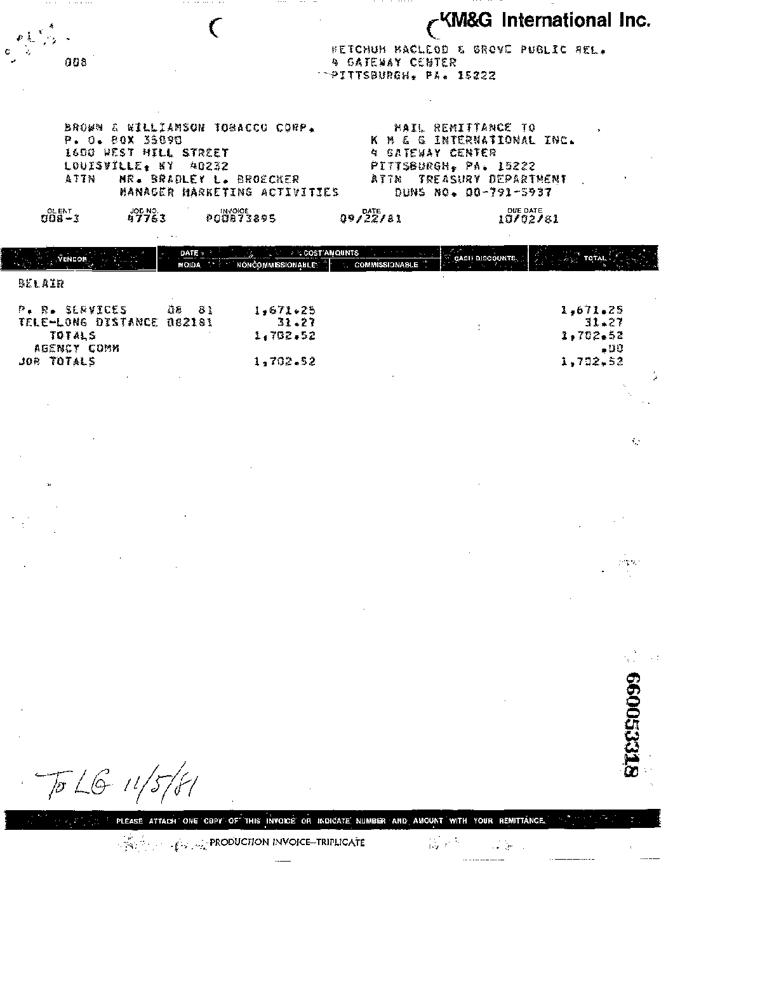

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/docs-sm/invoice/0000137486.jpg")
#image = image.convert("RGB")
image

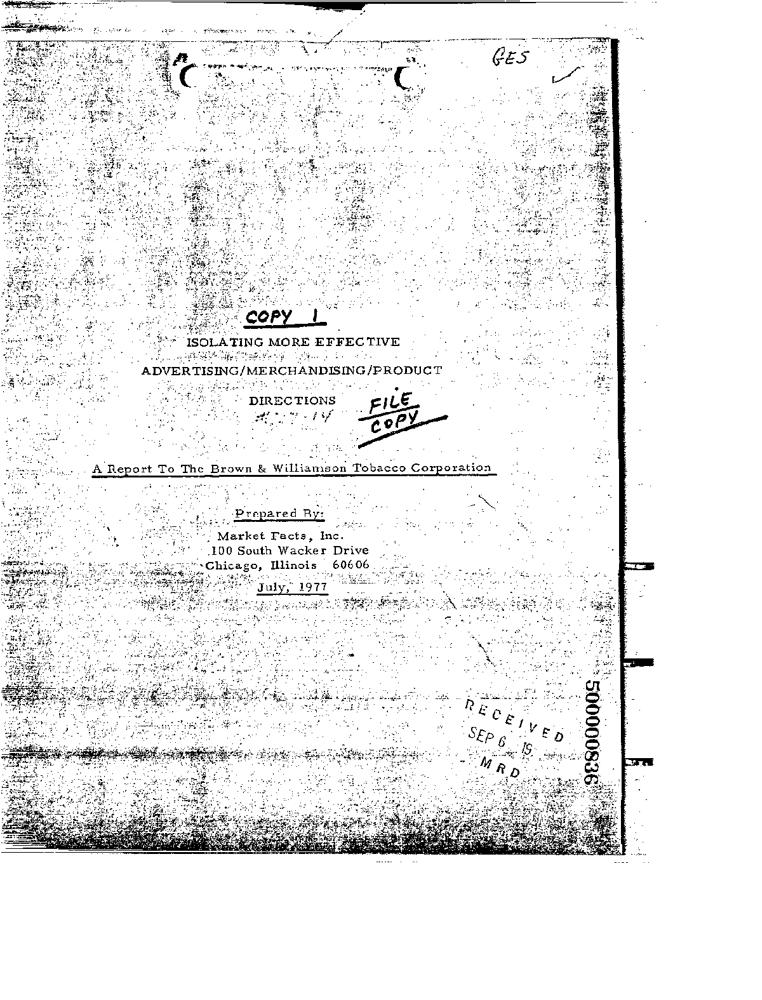

In [ ]:
image = Image.open("/content/docs-sm/questionnaire/0000002206.jpg")
image = image.convert("RGB")
image

In [ ]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'cory 1 MORE EFFECTIVE ING /MERCHANDISING /PRODUCT pinserions | gjLE “ =E9ey A Report To The Brown & Williamson Tobacco Corporation -N\\ Market Facts, Inc. 100 South Wacker Drive vo, Prepared ay:'

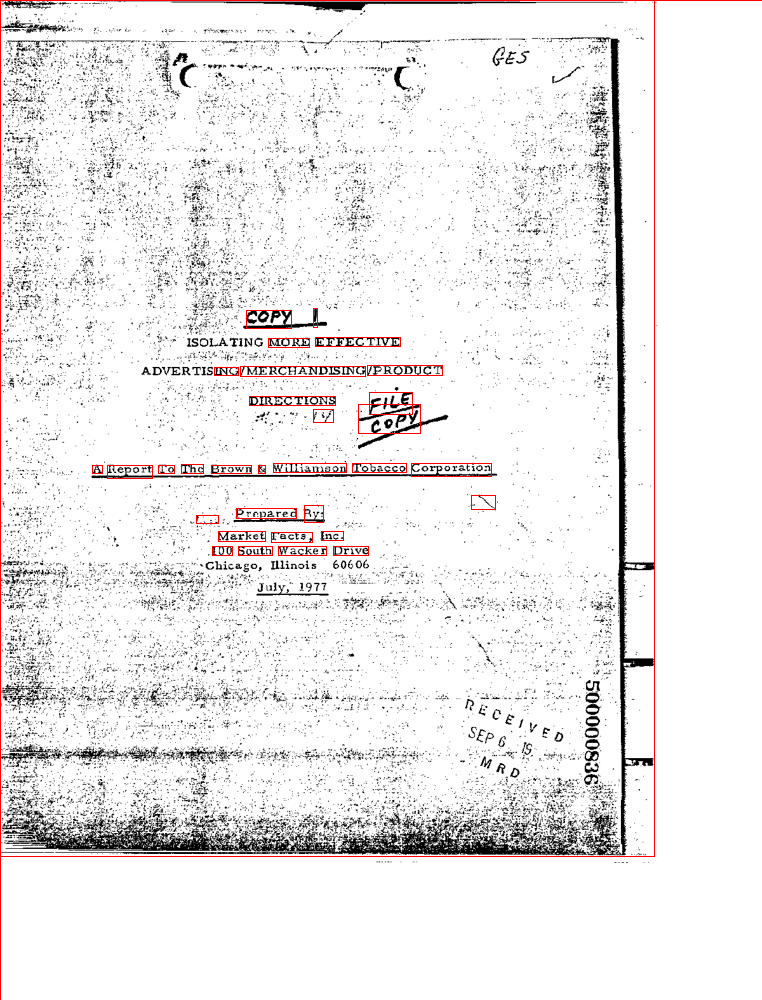

In [ ]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box 
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

In [ ]:
width, height = image.size

In [ ]:
ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
float_cols = ocr_df.select_dtypes('float').columns
ocr_df = ocr_df.dropna().reset_index(drop=True)
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
ocr_df = ocr_df.dropna().reset_index(drop=True)

In [ ]:
ocr_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,250,397,85,8,22,DIREcTions
1,5,1,1,1,1,2,370,393,33,11,0,fe}
2,5,1,1,1,1,3,404,394,8,10,54,El
3,5,1,1,1,2,1,359,405,14,13,44,ce
4,5,1,3,1,1,1,190,515,40,10,31,a.
5,5,1,3,1,1,2,234,505,113,22,23,See
6,5,1,3,1,2,1,218,531,48,11,73,Marked
7,5,1,3,1,2,2,271,532,42,11,45,fects]
8,5,1,3,1,2,3,321,531,23,10,47,nc]
9,5,1,3,1,3,1,212,546,21,10,58,(00


In [ ]:
words = list(ocr_df.text)

In [ ]:
words

['DIREcTions',
 'fe}',
 'El',
 'ce',
 'a.',
 'See',
 'Marked',
 'fects]',
 'nc]',
 '(00',
 'South',
 'Wackes',
 'Drive',
 '_',
 '“Chicago,',
 'Hlinois',
 '60606']

In [ ]:
import cv2 as cv
import math
from scipy import ndimage
import pytesseract as pt
import pandas as pd
import os 

In [ ]:
count=0
df = pd.DataFrame(columns=['text', 'doc_type'])
kernel= np.ones((1,1),np.uint8)

In [ ]:
os.path.basename(os.path.dirname("/content/docs-sm/form/0000980962.jpg"))

'form'

In [ ]:
os.path.basename(os.path.dirname("/content/docs-sm/form\\0000980962.jpg"))

'docs-sm'

In [ ]:
for subdir, dirs, files in os.walk("docs-sm"):
  print(subdir)

docs-sm
docs-sm/resume
docs-sm/letter
docs-sm/questionnaire
docs-sm/form
docs-sm/invoice


In [ ]:
for subdir, dirs, files in os.walk("docs-sm"):
    for file in files:
        im = Image.open(subdir+"/"+file)
        img=np.asarray(im)
        # #to convert into gray scale
        # img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        #for tilted images
        img_edges = cv.Canny(img, 100, 100, apertureSize=3)
        lines = cv.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
        angles = []
        if lines is not None:
            for x1, y1, x2, y2 in lines[0]:
                cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
                angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
                angles.append(angle)
            median_angle = np.median(angles)
            if (median_angle != 0) :
                img = ndimage.rotate(img, median_angle)
        #to read text using tesseract
        result=pt.image_to_data(img, output_type='data.frame')
        #to remove words with less confidence
        result = result[result.conf > 75]
        result_mean = result["conf"].mean()
        #to apply image preprocessing
        ret,thresh1 = cv.threshold(img,110,255,cv.THRESH_BINARY)
        blur = cv.bilateralFilter(thresh1,9,100,100)
        result_after_preproc = pt.image_to_data(blur, output_type='data.frame')
        result_after_preproc = result_after_preproc[result_after_preproc.conf > 75]
        result_after_preproc_mean= result_after_preproc["conf"].mean()
        if (result_mean<result_after_preproc_mean):
            result=result_after_preproc
        #to keep track of progress
        count=count+1
        print(count)
        #to extract file name and set it as class
        path=os.path.dirname(subdir+"/"+file)
        #joining words to form sentences
        text=''
        for a in result['text']:
            text=text+' '+ str(a)
        df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
 df.to_csv ('df.csv', encoding='utf-8', index = None, header=True)

In [ ]:
df.head(20)

,text,doc_type


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil

In [ ]:
shutil.copy("df.csv", "drive/folders/1ycaNMhgWnYQtBA40pcUGnnYKIR17Brdz/df.csv")

Load model for nlp using spacy

In [ ]:
! python -m spacy download en_core_web_sm

In [ ]:
import spacy
from spacy import displacy 
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = list(STOP_WORDS)
print(stopwords[:100])

In [ ]:
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)

Function to remove stopwords, punctuations and tokanize

In [ ]:
# Function to tokenise the text
def tokeniser(sentence):
    
    # Process the text
    doc = nlp(sentence)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]
    
    return tokens

Vectorisation using sklearn tfidf

In [ ]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

Train-test split

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df['text'], df['doc_type'], 
                                                    test_size = 0.2, random_state = 678)

Create machine learning pipe-line

<b>Naive Bayes & TF-IDF<b>

Build a Classifier Object

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier_NB = MultinomialNB()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_NB) ] )

Fit the model

In [ ]:
model_pipe_NB.fit(X_train,y_train)

Export model for future use

In [ ]:
import pickle

In [ ]:
filename = 'NB_model_5cat_data.sav'
pickle.dump(model_pipe_NB, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Predict on test data

In [ ]:
preds = model_pipe_NB.predict(X_test)

In [ ]:
preds[:10]

In [ ]:
X_test[:10]

In [ ]:
y_test[:10]

Compute accuracy

In [ ]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

# TF-IDF with diffrent classifiers

https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB()
    ]

In [ ]:
classifier_names = [
    'KNeighborsClassifier',
    'SVC',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'GradientBoostingClassifier',
    'MultinomialNB'
    ]

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

Iterate over each classifier and add entry into dataframe

In [ ]:
classifiers

In [ ]:
count=0
classifier_names[count]

In [ ]:
count=0
for clf in classifiers:
    #to create model pipeline for each classifier
    model_pipe = Pipeline( [ ('vectorizer', tfvectorizer), 
                             ('classifier', clf) ] )
    #to fit data on model pipe
    model_pipe.fit(X_train, y_train)
    #to save generated model
    filename = classifier_names[count] + '.sav'
    pickle.dump(model_pipe, open(filename, 'wb'))
    count=count+1
    #to print accuracy of each model
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = model_pipe.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    test_predictions_prob = model_pipe.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions_prob)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
classifier_RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

In [ ]:
model_pipe_RF = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_RF) ] )

In [ ]:
model_pipe_RF.fit(X_train,y_train)

In [ ]:
preds_RF = model_pipe_RF.predict(X_test)

In [ ]:
preds_RF[:10]

In [ ]:
X_test[:10]

In [ ]:
y_test[:10]

In [ ]:
# Accuracy
print("Train Accuracy: ", model_pipe_RF.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_RF.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,preds_RF)

In [ ]:
vectorized_df_X=tfvectorizer.fit_transform(X_train)

In [ ]:
vectorized_df_X_test=tfvectorizer.transform(X_test)

In [ ]:
classifier_RF

In [ ]:
grid_param = {
    'n_estimators': [50, 75, 100, 120, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gd_sr = GridSearchCV(estimator=classifier_RF,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)

In [ ]:
gd_sr.fit(vectorized_df_X, y_train)

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
gd_sr.best_estimator_

In [ ]:
best_result = gd_sr.best_score_
print(best_result)

In [ ]:
# Accuracy
print("Train Accuracy: ", gd_sr.score(vectorized_df_X, y_train))

# Accuracy
print("Test Accuracy: ", gd_sr.score(vectorized_df_X_test, y_test))

###################################################################################